In [47]:
#import netCDF4 as nc
import pandas as pd
#import pandasql as ps
import xarray as xr
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon
import numpy as np
import glob
import xarray as xr

pd.set_option('display.max_rows', 173)

In [48]:
shapeWorld = gpd.read_file('../data/world_shapefile/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')
data = pd.read_csv('../data/pred_new.csv')

            latitude  longitude  lsm  predict_value
time                                               
2016-01-01       377        377  377            377
2016-01-02       377        377  377            377
2016-01-03       377        377  377            377
2016-01-04       377        377  377            377
2016-01-05       377        377  377            377
...              ...        ...  ...            ...
2019-11-27       377        377  377            377
2019-11-28       377        377  377            377
2019-11-29       377        377  377            377
2019-11-30       377        377  377            377
2019-12-01       377        377  377            377

[1431 rows x 4 columns]


<AxesSubplot:>

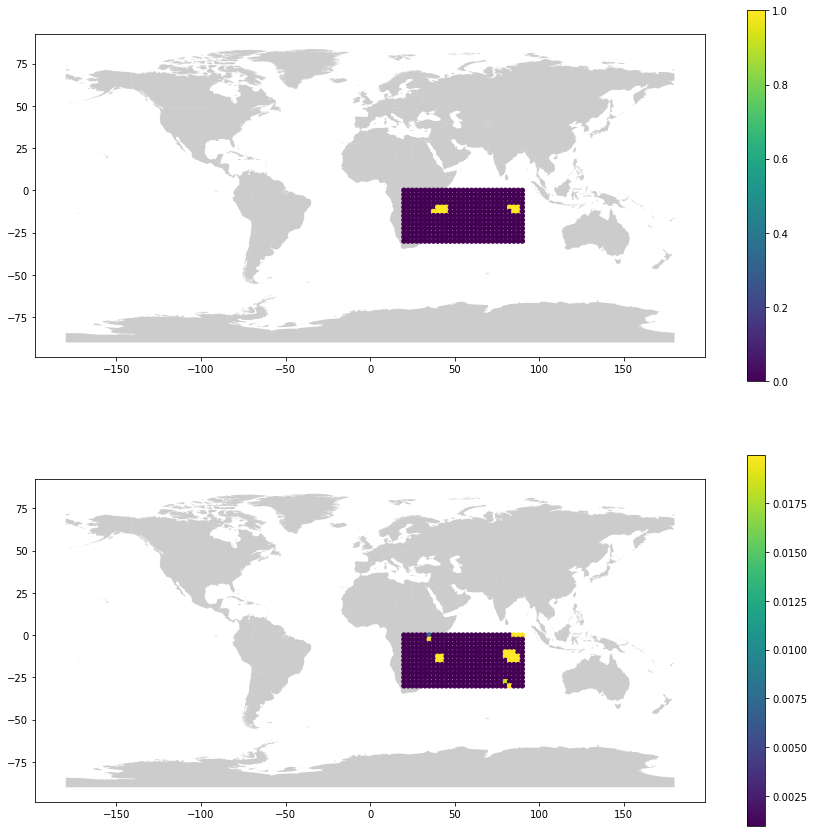

In [49]:
data = pd.read_csv('../data/pred_new.csv')
data = data.reset_index()
data = data.loc[:,['time','latitude','longitude','lsm', 'predict_value']]
print(data.groupby(['time']).count())

data = data.loc[data.time=='2019-04-25'].dropna()
#data.to_csv('sst_trop_bidim1.csv',index=False)

crs = {'init' : 'EPSG:4326'}

geometry_mi = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geometry_mi[:3]

features_gdf = gpd.GeoDataFrame(data,geometry=geometry_mi) # ,crs=crs

fig,ax = plt.subplots(2,1,figsize=(15,15))

shapeWorld.plot(ax=ax[0],alpha=0.4,color='grey')
features_gdf.plot(ax=ax[0],markersize=20,marker='o',label='lsm',column='lsm',legend=True)

shapeWorld.plot(ax=ax[1],alpha=0.4,color='grey')
features_gdf.plot(ax=ax[1],markersize=20,marker='o',label='predict_value',column='predict_value',legend=True)

In [46]:
data = pd.read_csv('../data/pred_new.csv')
data.loc[data.lsm!=0].groupby(['time']).count()

#2016-01-21, 2019-04-25 

,Unnamed: 0,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,lsm,predict_value
time,,,,,,,,,,,,
2016-01-21,6,6,6,6,6,6,6,6,6,6,6,6
2016-01-22,8,8,8,8,8,8,8,8,8,8,8,8
2016-01-23,8,8,8,8,8,8,8,8,8,8,8,8
2016-01-24,6,6,6,6,6,6,6,6,6,6,6,6
2016-01-25,6,6,6,6,6,6,6,6,6,6,6,6
2016-01-26,6,6,6,6,6,6,6,6,6,6,6,6
2016-01-27,5,5,5,5,5,5,5,5,5,5,5,5
2016-01-28,4,4,4,4,4,4,4,4,4,4,4,4
2016-01-30,3,3,3,3,3,3,3,3,3,3,3,3
